## Introduction

This tutorial is intended to assist beginners to learn tree-based modeling from scratch. After the successful completion of this tutorial, one is expected to become able to use tree-based algorithms and build predictive models.

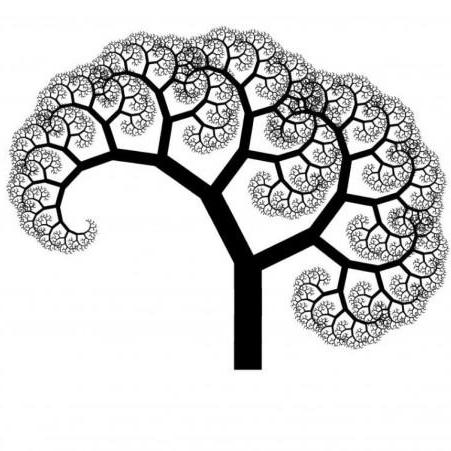

## Explore the data using Pandas

The first thing we'll need to do is load in the dataset. we will use the UK government’s land registry data. The goal of the tutorial is to predict how much a house will sell for.

You can find and download the data at: 
http://bit.ly/1Fq0svx (download FULL Price Paid Data-Single file 1995-2017)

A description of the columns in the data is available at: 
http://bit.ly/1hh97JI.

We will need to use Pandas library to process the data. Pandas is one of the basic libraries for Python data science, it provides powerful and easy-to-use data structures, as well as the means to quickly perform operations on these structures.
Next, we’ll check our data by head() function as below.



In [15]:
import pandas as pd

#Importing the data

data = pd.read_csv("~\pp-monthly-update-new-version.csv", sep='delimiter', header=None, delimiter=',', encoding = "ISO-8859-1")

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{773788C2-3852-2CE4-E053-6C04A8C05E57},148950,2004-07-16 00:00,BS22 9HQ,T,N,F,1,NaN,SAVERNAKE ROAD,NaN,WESTON-SUPER-MARE,NORTH SOMERSET,NORTH SOMERSET,A,A
1,{773788C2-5C4A-2CE4-E053-6C04A8C05E57},230000,2004-11-05 00:00,PL34 0HB,S,N,F,GLEN HOUSE,1,NaN,TREBARWITH STRAND,TINTAGEL,CORNWALL,CORNWALL,A,A
2,{773788C2-6BBD-2CE4-E053-6C04A8C05E57},340000,2004-01-20 00:00,EX5 3DZ,D,N,F,2,NaN,SHERCROFT CLOSE,BROADCLYST,EXETER,EAST DEVON,DEVON,A,A
3,{773788C2-6BEC-2CE4-E053-6C04A8C05E57},175000,2004-06-04 00:00,EX38 8NL,D,N,F,LANE END,NaN,NaN,WITHACOTT,TORRINGTON,TORRIDGE,DEVON,A,A
4,{773788C2-71DA-2CE4-E053-6C04A8C05E57},190000,2004-01-30 00:00,DT2 7LF,F,N,L,4,NaN,BARTON FARM,CERNE ABBAS,DORCHESTER,WEST DORSET,DORSET,A,A




## Handle missing values

Missing values arise for several reasons. So, we are going to see if there are any missing values, which will be represented with NaN or None.

In [16]:
#Checking missing values
missing_values_count = data.isnull().sum()
missing_values_count

0         0
1         0
2         0
3       552
4         0
5         0
6         0
7         0
8     89769
9      2129
10    64208
11        0
12        0
13        0
14        0
15        0
dtype: int64

There is a lot of ways to handle the missing value on a data set. yet, I’ll show you the best method for this: By using imputation.

Imputation fills within the missing value with some number. The imputed value will not be precisely right in most cases, however, it always offers additional correct models than dropping the column entirely.


from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data = my_imputer.fit_transform(data)

## Feature selection

Now let’s do some feature selection, that we will need for our prediction. 
For the sake of simplicity. we won’t complicate this task a lot, and we will choose three important features to predict the house price in our task.

Each row in our data contains a house that was purchased, the price that was paid, and the features of the house and purchase. we choose to predict the price that was paid from this features: the lease duration, the property type, and whether or not the property is in London. each feature is present in 4, 6, and 11th column. So let’s drop the remaining columns, and do a quick transformation for the 11th, saying it’s True:T if the property is in London or False:F.


In [17]:
#Selecting The Prediction Target
y = data[1]

#Selecting features
X = data.drop(data.columns[[0,1,2,3,5,7,8,9,10,12,13,14,15]], axis=1)

X[11] = X[11].apply(lambda x: "T" if 'LONDON' in x else "F")

## Splitting the data

We divide our data into training and test.


In [18]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2, random_state = 0)


## Convert categorical data using one-hot encoding

The feature that we’ve select are categorical now. Thought, for our regression problem, we should convert them into numerical values. 

The standard Approach for doing this is One-hot encoding. It generally produces new binary columns, showing the placement of each potential value from the original data. 

Hopefully, Pandas offers a useful method called get_dummies() that do the job, as follow.


In [19]:
#One-Hot Encoding
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

## Your first model: Decision tree

You will use the scikit-learn library to create our model. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

For our regression problem, Scikit-learn offers the DecisionTreeRegressor class. The method fit () takes as input the features X, and predict the targets y. (Warning: y are not class labels but real values).

After having a fitted model, we can then use it to make predictions, and evaluate it using the Mean Absolute Error in this task.


In [20]:
#Building the first decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(train_X, train_y)
melb_preds = tree_model.predict(test_X)

print(mean_absolute_error(test_y, melb_preds))

217122.206979


## Random Forest

After training our first decision tree, let’s try the Random Forest and compare its result.

Overall, the random forest algorithm provides optimization of decision trees. It uses the same principle as bagging, but with an additional randomization step in the selection of node attributes in order to reduce the variance of the resulting estimator. Additionally, one of the best features of Random Forest models is that they generally work reasonably even without this tuning. 

Next, we build a random forest model similarly to how we built a decision tree in sci-kit-learn, this time using the RandomForestRegressor class instead of DecisionTreeRegressor.


In [21]:
#Building the random Forest
from sklearn.ensemble import RandomForestRegressor
 
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))

c:\users\toshiba\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


216335.904248


## XGBoost

Now let’s loo, at a more sophisticated technique:XGBoost, which stand for Extrem Gradient Boosting. 

This technique becomes very successful in kaggle’s competitions nowadays, as it is more efficient and faster since it is composed of both a linear model and tree models. This in addition to its ability to perform parallel calculations on a single machine. 

For now, we will not go into details how this model works, let’s proceed directly to the prediction. 


In [22]:
#Building XGboost
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)
melb_preds = my_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))

207095.35517


XGBoost incorporates a few parameters that may dramatically have an effect on your model's accuracy and training speed, the ones we tend to employ in this tutorial are: 

- n_estimators: it defines how many times to go into the modeling cycle.
- early_stopping_rounds: it causes the model to prevent iterating once the validation score stops rising, even though we tend to are not at the arduous stop for n_estimators. (5 may be a reasonable value).
- learning_rate: normally, a little learning rate (and an oversized range of estimators) can yield a lot of correct XGBoost models, although it'll additionally take the model longer to train since it will a lot of iterations through the cycle.

As you can see, XGboost does very well comparing to both random forest and decision tree.

Here we have done with this tutorial. Thanks for your reading :)
